In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
%matplotlib inline

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Using pandas to read database
data = pd.read_csv('mnist.csv')

In [3]:
# Viewing COlumn Heads
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Extracting data from dataset
a = data.iloc[4,1:].values

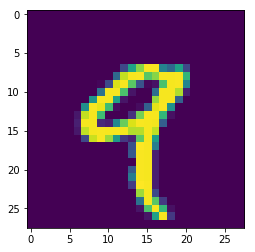

In [9]:
# Reshaping data
a = a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [10]:
# Preparing the data
# Seperating lables and data values
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]

In [13]:
# Creating test and train size of the model
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size = 0.2,random_state = 4)

In [19]:
# Check Data
x_train.head()
y_train.head()

20379    4
53032    4
27005    7
30510    8
508      1
Name: label, dtype: int64

In [21]:
# Calling Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 100)

In [22]:
# Fit the data
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
# Predicting data
pred = rf.predict(x_test)

In [24]:
pred

array([2, 7, 6, ..., 6, 4, 2])

In [25]:
# Checking Prediction
s = y_test.values

# Calculating correctly classified values
ctr = 0
for i in range(len(pred)):
    if(s[i]==pred[i]):
        ctr += 1

In [27]:
ctr

11618

In [34]:
# Percentage of correctly classified instances
Accuracy = int(ctr/len(pred) * 100)
print(str(Accuracy)+"%")

96%
